<h1>CLASSIFICATION</h1>

<p>Muhammad Hafidh Raditya</p>
<p>1301184079</p>
<p>IF-42-03</p>

In [1]:
import random as rd
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import style
from sklearn import datasets, linear_model
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

<h3>Import dataset yang diberikan</h3>

In [2]:
datatrain = pd.read_csv("salju_train.csv")
datatrain

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,...,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,...,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,...,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,...,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


In [3]:
datatest = pd.read_csv("salju_test.csv")
datatest

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,...,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,...,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,...,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,...,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


<h3>Data preprocessing untuk data train</h3>

<p>Drop column/atribut yang tidak diperlukan</p>

In [4]:
unscaled_datatrain = datatrain.drop(columns=['id','Tanggal','KodeLokasi'])

<p>Cek apakah data terdapat null value</p>

In [5]:
unscaled_datatrain.isnull().sum()

SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

<p>Cek keseluruhan atribut pada dataset, apakah terdapat outlier atau tidak</p>

<AxesSubplot:>

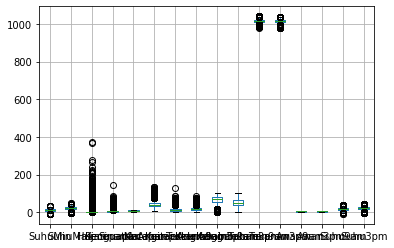

In [6]:
unscaled_datatrain.boxplot()

<p>Jika atribut tergolong numerical, maka ganti null value dengan mean. Namun jika atribut tergolong categorical, maka ganti null value dengan modus</p>

In [7]:
unscaled_datatrain["SuhuMin"].fillna(value=unscaled_datatrain["SuhuMin"].mean(), inplace = True)
unscaled_datatrain["SuhuMax"].fillna(value=unscaled_datatrain["SuhuMax"].mean(), inplace = True)
unscaled_datatrain["Hujan"].fillna(value=unscaled_datatrain["Hujan"].mean(), inplace = True)
unscaled_datatrain["Penguapan"].fillna(value=unscaled_datatrain["Penguapan"].mean(), inplace = True)
unscaled_datatrain["SinarMatahari"].fillna(value=unscaled_datatrain["SinarMatahari"].mean(), inplace = True)
unscaled_datatrain["ArahAnginTerkencang"].fillna(value=unscaled_datatrain["ArahAnginTerkencang"].mode()[0], inplace = True)#Categorical
unscaled_datatrain["KecepatanAnginTerkencang"].fillna(value=unscaled_datatrain["KecepatanAnginTerkencang"].mean(), inplace = True)
unscaled_datatrain["ArahAngin9am"].fillna(value=unscaled_datatrain["ArahAngin9am"].mode()[0], inplace = True)#categorical
unscaled_datatrain["ArahAngin3pm"].fillna(value=unscaled_datatrain["ArahAngin3pm"].mode()[0], inplace = True)#categorical
unscaled_datatrain["KecepatanAngin9am"].fillna(value=unscaled_datatrain["KecepatanAngin9am"].mean(), inplace = True)
unscaled_datatrain["KecepatanAngin3pm"].fillna(value=unscaled_datatrain["KecepatanAngin3pm"].mean(), inplace = True)
unscaled_datatrain["Kelembaban9am"].fillna(value=unscaled_datatrain["Kelembaban9am"].mean(), inplace = True)
unscaled_datatrain["Kelembaban3pm"].fillna(value=unscaled_datatrain["Kelembaban3pm"].mean(), inplace = True)
unscaled_datatrain["Tekanan9am"].fillna(value=unscaled_datatrain["Tekanan9am"].mean(), inplace = True)
unscaled_datatrain["Tekanan3pm"].fillna(value=unscaled_datatrain["Tekanan3pm"].mean(), inplace = True)
unscaled_datatrain["Awan9am"].fillna(value=unscaled_datatrain["Awan9am"].mean(), inplace = True)
unscaled_datatrain["Awan3pm"].fillna(value=unscaled_datatrain["Awan3pm"].mean(), inplace = True)
unscaled_datatrain["Suhu9am"].fillna(value=unscaled_datatrain["Suhu9am"].mean(), inplace = True)
unscaled_datatrain["Suhu3pm"].fillna(value=unscaled_datatrain["Suhu3pm"].mean(), inplace = True)
unscaled_datatrain["BersaljuHariIni"].fillna(value=unscaled_datatrain["BersaljuHariIni"].mode()[0], inplace = True)#Categorical
unscaled_datatrain["BersaljuBesok"].fillna(value=unscaled_datatrain["BersaljuBesok"].mode()[0], inplace = True)#categorical
unscaled_datatrain

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,5.46244,7.599527,WSW,24.000000,N,WSW,0.0,...,78.0,76.0,1020.10000,1018.500000,4.450893,4.51614,13.1,15.0,Ya,Tidak
1,9.0,17.0,8.0,2.60000,7.400000,W,40.032002,SW,WNW,13.0,...,80.0,61.0,1015.20000,1014.600000,7.000000,5.00000,11.9,15.5,Ya,Ya
2,18.2,32.0,0.0,5.46244,7.599527,ESE,44.000000,SE,SE,15.0,...,62.0,42.0,1017.64708,1015.253117,4.450893,4.51614,23.8,29.6,Tidak,Tidak
3,7.3,24.5,0.0,8.40000,10.400000,SSW,54.000000,N,SW,13.0,...,25.0,17.0,1019.20000,1016.900000,1.000000,7.00000,15.3,23.2,Tidak,Tidak
4,5.9,20.3,0.0,3.60000,12.600000,N,37.000000,NNW,ESE,22.0,...,55.0,48.0,1019.70000,1014.700000,2.000000,6.00000,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,20.1,23.7,0.0,7.20000,8.900000,ESE,43.000000,SE,ESE,24.0,...,74.0,70.0,1019.30000,1017.600000,4.000000,6.00000,22.0,22.1,Tidak,Ya
109091,15.7,25.2,0.0,5.46244,7.599527,SSE,37.000000,SSE,E,28.0,...,52.0,52.0,1018.40000,1016.200000,4.450893,4.51614,23.8,24.4,Tidak,Ya
109092,7.5,20.4,1.6,5.46244,7.599527,NW,33.000000,N,NW,4.0,...,92.0,51.0,1014.50000,1010.600000,4.450893,4.51614,12.6,19.8,Ya,Tidak
109093,10.8,29.8,0.0,7.80000,11.200000,E,48.000000,ESE,SE,13.0,...,35.0,18.0,1020.00000,1015.800000,0.000000,1.00000,21.7,29.2,Tidak,Tidak


<p>Sudah tidak ada null value lagi</p>

In [8]:
unscaled_datatrain.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

<p>Ubah categorical data menjadi numerical data agar mudah dibandingkan</p>

In [9]:
categorical = unscaled_datatrain.dtypes==object
categorical_cols = unscaled_datatrain.columns[categorical].tolist()
unscaled_datatrain[categorical_cols] = unscaled_datatrain[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
unscaled_datatrain[categorical_cols].head()
unscaled_datatrain

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,5.46244,7.599527,15,24.000000,3,15,0.0,...,78.0,76.0,1020.10000,1018.500000,4.450893,4.51614,13.1,15.0,1,0
1,9.0,17.0,8.0,2.60000,7.400000,13,40.032002,12,14,13.0,...,80.0,61.0,1015.20000,1014.600000,7.000000,5.00000,11.9,15.5,1,1
2,18.2,32.0,0.0,5.46244,7.599527,2,44.000000,9,9,15.0,...,62.0,42.0,1017.64708,1015.253117,4.450893,4.51614,23.8,29.6,0,0
3,7.3,24.5,0.0,8.40000,10.400000,11,54.000000,3,12,13.0,...,25.0,17.0,1019.20000,1016.900000,1.000000,7.00000,15.3,23.2,0,0
4,5.9,20.3,0.0,3.60000,12.600000,3,37.000000,6,2,22.0,...,55.0,48.0,1019.70000,1014.700000,2.000000,6.00000,12.4,18.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,20.1,23.7,0.0,7.20000,8.900000,2,43.000000,9,2,24.0,...,74.0,70.0,1019.30000,1017.600000,4.000000,6.00000,22.0,22.1,0,1
109091,15.7,25.2,0.0,5.46244,7.599527,10,37.000000,10,0,28.0,...,52.0,52.0,1018.40000,1016.200000,4.450893,4.51614,23.8,24.4,0,1
109092,7.5,20.4,1.6,5.46244,7.599527,7,33.000000,3,7,4.0,...,92.0,51.0,1014.50000,1010.600000,4.450893,4.51614,12.6,19.8,1,0
109093,10.8,29.8,0.0,7.80000,11.200000,0,48.000000,2,9,13.0,...,35.0,18.0,1020.00000,1015.800000,0.000000,1.00000,21.7,29.2,0,0


<p>Cek outlier lagi menggunakan boxplot</p>

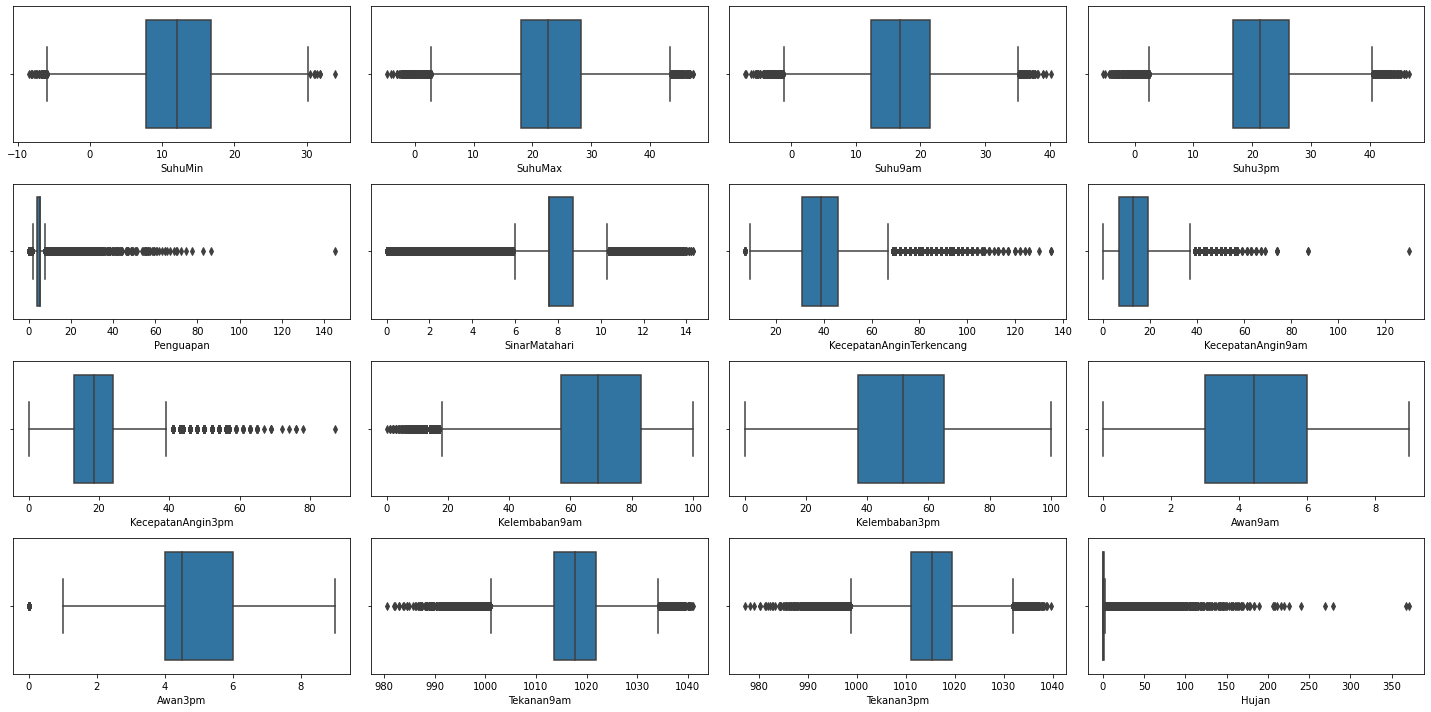

In [10]:
fig, axs = plt.subplots(4,4, figsize = (20,10))
plt1 = sns.boxplot(x=unscaled_datatrain['SuhuMin'], ax = axs[0,0])
plt2 = sns.boxplot(x=unscaled_datatrain['SuhuMax'], ax = axs[0,1])
plt3 = sns.boxplot(x=unscaled_datatrain['Suhu9am'], ax = axs[0,2])
plt4 = sns.boxplot(x=unscaled_datatrain['Suhu3pm'], ax = axs[0,3])
plt5 = sns.boxplot(x=unscaled_datatrain['Penguapan'], ax = axs[1,0])
plt6 = sns.boxplot(x=unscaled_datatrain['SinarMatahari'], ax = axs[1,1])
plt7 = sns.boxplot(x=unscaled_datatrain['KecepatanAnginTerkencang'], ax = axs[1,2])
plt8 = sns.boxplot(x=unscaled_datatrain['KecepatanAngin9am'], ax = axs[1,3])
plt9 = sns.boxplot(x=unscaled_datatrain['KecepatanAngin3pm'], ax = axs[2,0])
plt10 = sns.boxplot(x=unscaled_datatrain['Kelembaban9am'], ax = axs[2,1])
plt11 = sns.boxplot(x=unscaled_datatrain['Kelembaban3pm'], ax = axs[2,2])
plt12 = sns.boxplot(x=unscaled_datatrain['Awan9am'], ax = axs[2,3])
plt13 = sns.boxplot(x=unscaled_datatrain['Awan3pm'], ax = axs[3,0])
plt14 = sns.boxplot(x=unscaled_datatrain['Tekanan9am'], ax = axs[3,1])
plt15 = sns.boxplot(x=unscaled_datatrain['Tekanan3pm'], ax = axs[3,2])
plt16 = sns.boxplot(x=unscaled_datatrain['Hujan'], ax = axs[3,3])


plt.tight_layout()

<p>Data yang tergolong outlier ini tidak akan kami drop semua selama nilainya masih dalam skala yang normal. Semua atribut pada boxplot diatas masih memiliki value dengan skala yang normal. Namun setelah melakukan penelitian, kami menemukan tentang Fujita Scale yang menjelaskan tentang skala minimum sampai maksimum dari angin topan. Fujita Scale tersebut menjelaskan kalau batas minimum kecepatan angin agar bisa disebut sebagai angin topan adalah sebesar 40 mph. Karena dataset ini menggunakan satuan kmh untuk atribut kecepatan angin, maka 40 mph sama dengan 64 kmh. Maka dari itu kami memutuskan untuk menetapkan jika kecepatan angin sudah diatas 64 kmh, maka data tersebut sudah tidak dalam skala yang normal karena sudah dapat dikategorikan sebagai bencana angin topan dan akan kami drop dari dataset</p>

In [11]:
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain['KecepatanAnginTerkencang'] > 64].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain['KecepatanAngin9am'] > 64].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain['KecepatanAngin3pm'] > 64].index ,inplace =True)

In [12]:
def outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    
    upper_bound = q3 + (iqr*1.5)
    lower_bound = q1 - (iqr*1.5)
    
    return iqr, upper_bound, lower_bound

In [13]:
# for i in ['SuhuMin','SuhuMax','Suhu9am','Suhu3pm','SinarMatahari', 'KecepatanAnginTerkencang','KecepatanAngin9am','KecepatanAngin3pm', 'Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm', 'Tekanan9am','Tekanan3pm']:
#     iqr, upperbound, lowerbound = outliers(unscaled_datatrain, i)
#     unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain[i] > upperbound].index ,inplace =True)
#     unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain[i] < lowerbound].index ,inplace =True)
# #     unscaled_datatrain[i] = np.where(unscaled_datatrain[i]>upperbound, upperbound,unscaled_datatrain[i])
# #     unscaled_datatrain[i] = np.where(unscaled_datatrain[i]<lowerbound, lowerbound,unscaled_datatrain[i])

<p>Dataset sudah bersih dari outlier</p>

In [14]:
unscaled_datatrain

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,5.46244,7.599527,15,24.000000,3,15,0.0,...,78.0,76.0,1020.10000,1018.500000,4.450893,4.51614,13.1,15.0,1,0
1,9.0,17.0,8.0,2.60000,7.400000,13,40.032002,12,14,13.0,...,80.0,61.0,1015.20000,1014.600000,7.000000,5.00000,11.9,15.5,1,1
2,18.2,32.0,0.0,5.46244,7.599527,2,44.000000,9,9,15.0,...,62.0,42.0,1017.64708,1015.253117,4.450893,4.51614,23.8,29.6,0,0
3,7.3,24.5,0.0,8.40000,10.400000,11,54.000000,3,12,13.0,...,25.0,17.0,1019.20000,1016.900000,1.000000,7.00000,15.3,23.2,0,0
4,5.9,20.3,0.0,3.60000,12.600000,3,37.000000,6,2,22.0,...,55.0,48.0,1019.70000,1014.700000,2.000000,6.00000,12.4,18.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,20.1,23.7,0.0,7.20000,8.900000,2,43.000000,9,2,24.0,...,74.0,70.0,1019.30000,1017.600000,4.000000,6.00000,22.0,22.1,0,1
109091,15.7,25.2,0.0,5.46244,7.599527,10,37.000000,10,0,28.0,...,52.0,52.0,1018.40000,1016.200000,4.450893,4.51614,23.8,24.4,0,1
109092,7.5,20.4,1.6,5.46244,7.599527,7,33.000000,3,7,4.0,...,92.0,51.0,1014.50000,1010.600000,4.450893,4.51614,12.6,19.8,1,0
109093,10.8,29.8,0.0,7.80000,11.200000,0,48.000000,2,9,13.0,...,35.0,18.0,1020.00000,1015.800000,0.000000,1.00000,21.7,29.2,0,0


<p>Import data yang belum dilakukan minmaxscaler kedalam file csv</p>

In [15]:
unscaled_datatrain.to_csv('unscaled_train.csv')

<p>Lakukan minmaxscaler</p>

In [16]:
mms = MinMaxScaler()
scaler = mms.fit_transform(unscaled_datatrain)
col_new = ['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm','BersaljuHariIni','BersaljuBesok']
scaled_datatrain = pd.DataFrame(scaler, columns=col_new)
scaled_datatrain

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.445755,0.376471,0.012938,0.037672,0.531435,1.000000,0.303571,0.200000,1.000000,0.000000,...,0.78,0.76,0.640275,0.644781,0.494544,0.501793,0.425847,0.392578,1.0,0.0
1,0.412736,0.405882,0.021563,0.017931,0.517483,0.866667,0.589857,0.800000,0.933333,0.206349,...,0.80,0.61,0.555938,0.579125,0.777778,0.555556,0.400424,0.402344,1.0,1.0
2,0.629717,0.700000,0.000000,0.037672,0.531435,0.133333,0.660714,0.600000,0.600000,0.238095,...,0.62,0.42,0.598056,0.590120,0.494544,0.501793,0.652542,0.677734,0.0,0.0
3,0.372642,0.552941,0.000000,0.057931,0.727273,0.733333,0.839286,0.200000,0.800000,0.206349,...,0.25,0.17,0.624785,0.617845,0.111111,0.777778,0.472458,0.552734,0.0,0.0
4,0.339623,0.470588,0.000000,0.024828,0.881119,0.200000,0.535714,0.400000,0.133333,0.349206,...,0.55,0.48,0.633391,0.580808,0.222222,0.666667,0.411017,0.453125,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103369,0.674528,0.537255,0.000000,0.049655,0.622378,0.133333,0.642857,0.600000,0.133333,0.380952,...,0.74,0.70,0.626506,0.629630,0.444444,0.666667,0.614407,0.531250,0.0,1.0
103370,0.570755,0.566667,0.000000,0.037672,0.531435,0.666667,0.535714,0.666667,0.000000,0.444444,...,0.52,0.52,0.611015,0.606061,0.494544,0.501793,0.652542,0.576172,0.0,1.0
103371,0.377358,0.472549,0.004313,0.037672,0.531435,0.466667,0.464286,0.200000,0.466667,0.063492,...,0.92,0.51,0.543890,0.511785,0.494544,0.501793,0.415254,0.486328,1.0,0.0
103372,0.455189,0.656863,0.000000,0.053793,0.783217,0.000000,0.732143,0.133333,0.600000,0.206349,...,0.35,0.18,0.638554,0.599327,0.000000,0.111111,0.608051,0.669922,0.0,0.0


<p>import data yang sudah dilakukan minmaxscaler kedalam file csv</p>

In [17]:
scaled_datatrain.to_csv("scaled_train.csv")

<h3>Data preprocessing untuk data test</h3>

<p>Drop column/atribut yang tidak diperlukan<p>

In [18]:
unscaled_datatest = datatest.drop(columns=['Tanggal', 'KodeLokasi'])
unscaled_datatest

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,...,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,...,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,...,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,...,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


<p>Cek apakah data terdapat null value</p>

In [19]:
unscaled_datatest.isnull().sum()

SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

<p>Cek outlier keseluruhan atribut pada dataset, apakah terdapat outlier atau tidak</p>

<AxesSubplot:>

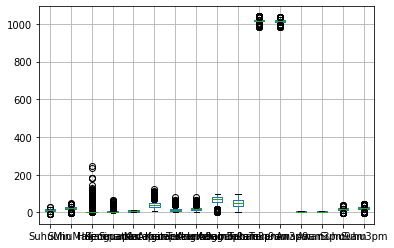

In [20]:
unscaled_datatest.boxplot()

<p>Jika atribut tergolong numerical, maka ganti null value menjadi mean. Jika atribut tergolong categorical, maka ganti null value dengan modus</p>

In [21]:
unscaled_datatest["SuhuMin"].fillna(value=unscaled_datatest["SuhuMin"].mean(), inplace = True)
unscaled_datatest["SuhuMax"].fillna(value=unscaled_datatest["SuhuMax"].mean(), inplace = True)
unscaled_datatest["Hujan"].fillna(value=unscaled_datatest["Hujan"].mean(), inplace = True)
unscaled_datatest["Penguapan"].fillna(value=unscaled_datatest["Penguapan"].mean(), inplace = True)
unscaled_datatest["SinarMatahari"].fillna(value=unscaled_datatest["SinarMatahari"].mean(), inplace = True)
unscaled_datatest["ArahAnginTerkencang"].fillna(value=unscaled_datatest["ArahAnginTerkencang"].mode()[0], inplace = True)#Categorical
unscaled_datatest["KecepatanAnginTerkencang"].fillna(value=unscaled_datatest["KecepatanAnginTerkencang"].mean(), inplace = True)
unscaled_datatest["ArahAngin9am"].fillna(value=unscaled_datatest["ArahAngin9am"].mode()[0], inplace = True)#categorical
unscaled_datatest["ArahAngin3pm"].fillna(value=unscaled_datatest["ArahAngin3pm"].mode()[0], inplace = True)#categorical
unscaled_datatest["KecepatanAngin9am"].fillna(value=unscaled_datatest["KecepatanAngin9am"].mean(), inplace = True)
unscaled_datatest["KecepatanAngin3pm"].fillna(value=unscaled_datatest["KecepatanAngin3pm"].mean(), inplace = True)
unscaled_datatest["Kelembaban9am"].fillna(value=unscaled_datatest["Kelembaban9am"].mean(), inplace = True)
unscaled_datatest["Kelembaban3pm"].fillna(value=unscaled_datatest["Kelembaban3pm"].mean(), inplace = True)
unscaled_datatest["Tekanan9am"].fillna(value=unscaled_datatest["Tekanan9am"].mean(), inplace = True)
unscaled_datatest["Tekanan3pm"].fillna(value=unscaled_datatest["Tekanan3pm"].mean(), inplace = True)
unscaled_datatest["Awan9am"].fillna(value=unscaled_datatest["Awan9am"].mean(), inplace = True)
unscaled_datatest["Awan3pm"].fillna(value=unscaled_datatest["Awan3pm"].mean(), inplace = True)
unscaled_datatest["Suhu9am"].fillna(value=unscaled_datatest["Suhu9am"].mean(), inplace = True)
unscaled_datatest["Suhu3pm"].fillna(value=unscaled_datatest["Suhu3pm"].mean(), inplace = True)
unscaled_datatest["BersaljuHariIni"].fillna(value=unscaled_datatest["BersaljuHariIni"].mode()[0], inplace = True)#Categorical
unscaled_datatest["BersaljuBesok"].fillna(value=unscaled_datatest["BersaljuBesok"].mode()[0], inplace = True)#categorical
unscaled_datatest

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,11.0,27.5,0.0,5.509646,6.400000,WSW,46.000000,W,W,20.0,...,39.0,56.0,1013.00000,1012.400000,4.00000,7.000000,25.7,23.6,No,No
1,10.0,19.9,0.2,5.509646,7.630135,WNW,56.000000,W,NW,24.0,...,76.0,32.0,1017.00000,1015.200000,8.00000,1.000000,10.7,18.9,No,Yes
2,9.2,27.2,0.0,5.200000,10.400000,SSW,33.000000,NE,N,13.0,...,89.0,27.0,1018.60000,1015.700000,0.00000,1.000000,13.9,26.3,No,No
3,17.7,27.0,0.0,4.600000,6.700000,SW,35.000000,E,SSE,20.0,...,55.0,41.0,1010.20000,1008.600000,7.00000,6.000000,22.3,26.4,No,No
4,2.3,7.9,88.0,5.509646,7.630135,NW,46.000000,W,WNW,13.0,...,98.0,95.0,1017.56166,1015.181064,4.44982,4.498322,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,7.8,25.8,0.0,8.000000,13.200000,NE,31.000000,ENE,NW,22.0,...,59.0,21.0,1017.10000,1014.200000,6.00000,1.000000,16.8,24.0,No,No
18178,12.4,26.6,0.0,8.000000,11.600000,NW,37.000000,NE,WNW,17.0,...,59.0,25.0,1022.20000,1018.700000,1.00000,1.000000,17.1,25.7,No,No
18179,6.7,22.9,0.0,5.509646,7.630135,SSE,39.974095,N,NW,0.0,...,84.0,35.0,1017.56166,1015.181064,1.00000,2.000000,11.8,22.0,No,No
18180,12.5,26.7,0.0,9.000000,10.800000,NE,35.000000,SW,ENE,2.0,...,56.0,45.0,1021.90000,1018.100000,5.00000,5.000000,22.9,25.4,No,No


<p>Dataset sudah bersih dari null value</p>

In [22]:
unscaled_datatest.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

<p>Ubah categorical data menjadi numerical data agar mudah dibandingkan</p>

In [23]:
categorical = unscaled_datatest.dtypes==object
categorical_cols = unscaled_datatest.columns[categorical].tolist()
unscaled_datatest[categorical_cols] = unscaled_datatest[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
unscaled_datatest[categorical_cols].head()
unscaled_datatest

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,11.0,27.5,0.0,5.509646,6.400000,15,46.000000,13,13,20.0,...,39.0,56.0,1013.00000,1012.400000,4.00000,7.000000,25.7,23.6,0,0
1,10.0,19.9,0.2,5.509646,7.630135,14,56.000000,13,7,24.0,...,76.0,32.0,1017.00000,1015.200000,8.00000,1.000000,10.7,18.9,0,1
2,9.2,27.2,0.0,5.200000,10.400000,11,33.000000,4,3,13.0,...,89.0,27.0,1018.60000,1015.700000,0.00000,1.000000,13.9,26.3,0,0
3,17.7,27.0,0.0,4.600000,6.700000,12,35.000000,0,10,20.0,...,55.0,41.0,1010.20000,1008.600000,7.00000,6.000000,22.3,26.4,0,0
4,2.3,7.9,88.0,5.509646,7.630135,7,46.000000,13,14,13.0,...,98.0,95.0,1017.56166,1015.181064,4.44982,4.498322,4.4,6.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,7.8,25.8,0.0,8.000000,13.200000,4,31.000000,1,7,22.0,...,59.0,21.0,1017.10000,1014.200000,6.00000,1.000000,16.8,24.0,0,0
18178,12.4,26.6,0.0,8.000000,11.600000,7,37.000000,4,14,17.0,...,59.0,25.0,1022.20000,1018.700000,1.00000,1.000000,17.1,25.7,0,0
18179,6.7,22.9,0.0,5.509646,7.630135,10,39.974095,3,7,0.0,...,84.0,35.0,1017.56166,1015.181064,1.00000,2.000000,11.8,22.0,0,0
18180,12.5,26.7,0.0,9.000000,10.800000,4,35.000000,12,1,2.0,...,56.0,45.0,1021.90000,1018.100000,5.00000,5.000000,22.9,25.4,0,0


<p>Cek outlier lagi menggunakan boxplot</p>

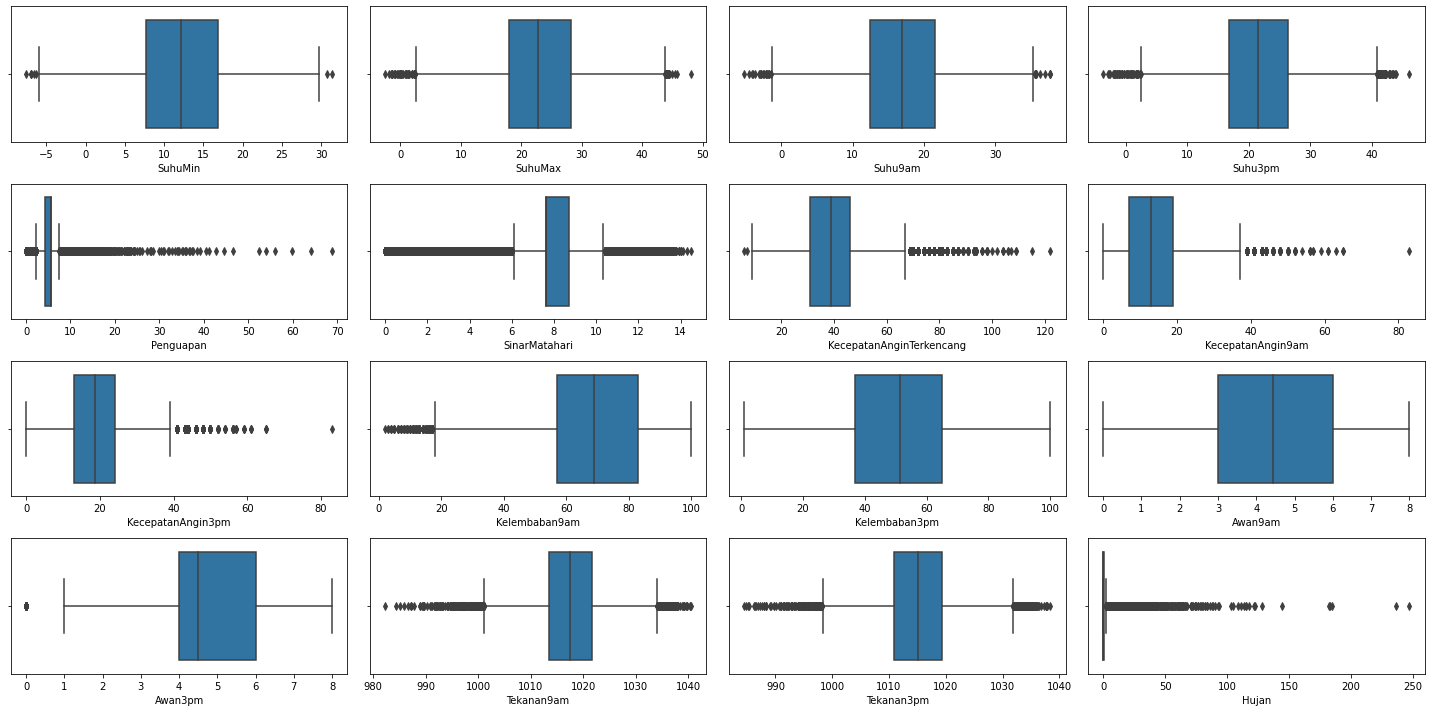

In [24]:
fig, axs = plt.subplots(4,4, figsize = (20,10))
plt1 = sns.boxplot(x=unscaled_datatest['SuhuMin'], ax = axs[0,0])
plt2 = sns.boxplot(x=unscaled_datatest['SuhuMax'], ax = axs[0,1])
plt3 = sns.boxplot(x=unscaled_datatest['Suhu9am'], ax = axs[0,2])
plt4 = sns.boxplot(x=unscaled_datatest['Suhu3pm'], ax = axs[0,3])
plt5 = sns.boxplot(x=unscaled_datatest['Penguapan'], ax = axs[1,0])
plt6 = sns.boxplot(x=unscaled_datatest['SinarMatahari'], ax = axs[1,1])
plt7 = sns.boxplot(x=unscaled_datatest['KecepatanAnginTerkencang'], ax = axs[1,2])
plt8 = sns.boxplot(x=unscaled_datatest['KecepatanAngin9am'], ax = axs[1,3])
plt9 = sns.boxplot(x=unscaled_datatest['KecepatanAngin3pm'], ax = axs[2,0])
plt10 = sns.boxplot(x=unscaled_datatest['Kelembaban9am'], ax = axs[2,1])
plt11 = sns.boxplot(x=unscaled_datatest['Kelembaban3pm'], ax = axs[2,2])
plt12 = sns.boxplot(x=unscaled_datatest['Awan9am'], ax = axs[2,3])
plt13 = sns.boxplot(x=unscaled_datatest['Awan3pm'], ax = axs[3,0])
plt14 = sns.boxplot(x=unscaled_datatest['Tekanan9am'], ax = axs[3,1])
plt15 = sns.boxplot(x=unscaled_datatest['Tekanan3pm'], ax = axs[3,2])
plt16 = sns.boxplot(x=unscaled_datatest['Hujan'], ax = axs[3,3])

plt.tight_layout()

<p>Data yang tergolong outlier ini tidak akan kami drop semua selama nilainya masih dalam skala yang normal. Semua atribut pada boxplot diatas masih memiliki value dengan skala yang normal. Namun setelah melakukan penelitian, kami menemukan tentang Fujita Scale yang menjelaskan tentang skala minimum sampai maksimum dari angin topan. Fujita Scale tersebut menjelaskan kalau batas minimum kecepatan angin agar bisa disebut sebagai angin topan adalah sebesar 40 mph. Karena dataset ini menggunakan satuan kmh untuk atribut kecepatan angin, maka 40 mph sama dengan 64 kmh. Maka dari itu kami memutuskan untuk menetapkan jika kecepatan angin sudah diatas 64 kmh, maka data tersebut sudah tidak dalam skala yang normal karena sudah dapat dikategorikan sebagai bencana angin topan dan akan kami drop dari dataset</p>

In [25]:
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest['KecepatanAnginTerkencang'] > 64].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest['KecepatanAngin9am'] > 64].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest['KecepatanAngin3pm'] > 64].index ,inplace =True)

In [26]:
# for i in ['SuhuMin','SuhuMax','Suhu9am','Suhu3pm','SinarMatahari', 'KecepatanAnginTerkencang','KecepatanAngin9am','KecepatanAngin3pm', 'Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm', 'Tekanan9am','Tekanan3pm']:
#     iqr, upperbound, lowerbound = outliers(unscaled_datatest, i)
# #     unscaled_datatest[i] = np.where(unscaled_datatest[i]>upperbound, iqr,unscaled_datatest[i])
# #     unscaled_datatest[i] = np.where(unscaled_datatest[i]<lowerbound, iqr,unscaled_datatest[i])
#     unscaled_datatest.drop(unscaled_datatest[unscaled_datatest[i] > upperbound].index ,inplace =True)
#     unscaled_datatest.drop(unscaled_datatest[unscaled_datatest[i] < lowerbound].index ,inplace =True)

<p>Dataset sudah bersih dari outlier</p>

In [27]:
unscaled_datatest

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,11.0,27.5,0.0,5.509646,6.400000,15,46.000000,13,13,20.0,...,39.0,56.0,1013.00000,1012.400000,4.00000,7.000000,25.7,23.6,0,0
1,10.0,19.9,0.2,5.509646,7.630135,14,56.000000,13,7,24.0,...,76.0,32.0,1017.00000,1015.200000,8.00000,1.000000,10.7,18.9,0,1
2,9.2,27.2,0.0,5.200000,10.400000,11,33.000000,4,3,13.0,...,89.0,27.0,1018.60000,1015.700000,0.00000,1.000000,13.9,26.3,0,0
3,17.7,27.0,0.0,4.600000,6.700000,12,35.000000,0,10,20.0,...,55.0,41.0,1010.20000,1008.600000,7.00000,6.000000,22.3,26.4,0,0
4,2.3,7.9,88.0,5.509646,7.630135,7,46.000000,13,14,13.0,...,98.0,95.0,1017.56166,1015.181064,4.44982,4.498322,4.4,6.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,7.8,25.8,0.0,8.000000,13.200000,4,31.000000,1,7,22.0,...,59.0,21.0,1017.10000,1014.200000,6.00000,1.000000,16.8,24.0,0,0
18178,12.4,26.6,0.0,8.000000,11.600000,7,37.000000,4,14,17.0,...,59.0,25.0,1022.20000,1018.700000,1.00000,1.000000,17.1,25.7,0,0
18179,6.7,22.9,0.0,5.509646,7.630135,10,39.974095,3,7,0.0,...,84.0,35.0,1017.56166,1015.181064,1.00000,2.000000,11.8,22.0,0,0
18180,12.5,26.7,0.0,9.000000,10.800000,4,35.000000,12,1,2.0,...,56.0,45.0,1021.90000,1018.100000,5.00000,5.000000,22.9,25.4,0,0


<p>Import data yang belum dilakukan minmaxscaler kedalam file csv</p>

In [28]:
unscaled_datatest.to_csv("unscaled_test.csv")

<p>Lakukan minmaxscaler</p>

In [29]:
mms = MinMaxScaler()
scaler = mms.fit_transform(unscaled_datatest)
col_new = ['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm','BersaljuHariIni','BersaljuBesok']
scaled_datatest = pd.DataFrame(scaler, columns=col_new)
scaled_datatest

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.476923,0.625000,0.000000,0.080082,0.441379,1.000000,0.701754,0.866667,0.866667,0.370370,...,0.377551,0.555556,0.502703,0.514019,0.500000,0.87500,0.721963,0.573529,0.0,0.0
1,0.451282,0.466667,0.000809,0.080082,0.526216,0.933333,0.877193,0.866667,0.466667,0.444444,...,0.755102,0.313131,0.574775,0.566355,1.000000,0.12500,0.371495,0.474790,0.0,1.0
2,0.430769,0.618750,0.000000,0.075581,0.717241,0.733333,0.473684,0.266667,0.200000,0.240741,...,0.887755,0.262626,0.603604,0.575701,0.000000,0.12500,0.446262,0.630252,0.0,0.0
3,0.648718,0.614583,0.000000,0.066860,0.462069,0.800000,0.508772,0.000000,0.666667,0.370370,...,0.540816,0.404040,0.452252,0.442991,0.875000,0.75000,0.642523,0.632353,0.0,0.0
4,0.253846,0.216667,0.355987,0.080082,0.526216,0.466667,0.701754,0.866667,0.933333,0.240741,...,0.979592,0.949495,0.584895,0.566001,0.556228,0.56229,0.224299,0.203782,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17237,0.394872,0.589583,0.000000,0.116279,0.910345,0.266667,0.438596,0.066667,0.466667,0.407407,...,0.581633,0.202020,0.576577,0.547664,0.750000,0.12500,0.514019,0.581933,0.0,0.0
17238,0.512821,0.606250,0.000000,0.116279,0.800000,0.466667,0.543860,0.266667,0.933333,0.314815,...,0.581633,0.242424,0.668468,0.631776,0.125000,0.12500,0.521028,0.617647,0.0,0.0
17239,0.366667,0.529167,0.000000,0.080082,0.526216,0.666667,0.596037,0.200000,0.466667,0.000000,...,0.836735,0.343434,0.584895,0.566001,0.125000,0.25000,0.397196,0.539916,0.0,0.0
17240,0.515385,0.608333,0.000000,0.130814,0.744828,0.266667,0.508772,0.800000,0.066667,0.037037,...,0.551020,0.444444,0.663063,0.620561,0.625000,0.62500,0.656542,0.611345,0.0,0.0


<p>import data yang sudah dilakukan minmaxscaler kedalam file csv</p>

In [30]:
scaled_datatest.to_csv("scaled_test.csv")

<h3>PROSES CLASSIFICATION</h3>

<p>Pada tahap ini kami akan melakukan eksperimen pada dua jenis dataset yang sudah kami buat, yaitu dataset yang sudah dilakukan minmaxscaler dan yang belum dilakukan minmaxscaler. Eksperimen kami lakukan menggunakan dua jenis algoritma, yaitu algoritma Naive Bayes dan algoritma ID3</p>

<h4>1. Prediksi apakah hari ini bersalju atau tidak</h4>

<b>Klasifikasi untuk dataset yang sudah dilakukan minmaxscaler</b>

In [31]:
x_today_scaled_train = scaled_datatrain[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_today_scaled_train = scaled_datatrain[['BersaljuHariIni']]
x_today_scaled_test = scaled_datatest[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_today_scaled_test = scaled_datatest[['BersaljuHariIni']]

<ul>
    <li><b style="color:red">Algoritma Naive Bayes</b></li>
</ul>

In [32]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(x_today_scaled_train, y_today_scaled_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(x_today_scaled_test)
y_pred_NB

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0., 0., 0., ..., 0., 0., 1.])

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_today_scaled_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[12663   954]
 [   27  3598]]
Accuracy Score : 0.9431040482542629
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     13617
         1.0       0.79      0.99      0.88      3625

    accuracy                           0.94     17242
   macro avg       0.89      0.96      0.92     17242
weighted avg       0.95      0.94      0.95     17242



<ul>
    <li><b style="color:green">Algoritma ID3</b></li>
</ul>

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_today_scaled_train, y_today_scaled_train)
y_pred_ID3 = model_dt.predict(x_today_scaled_test)
y_pred_ID3

array([0., 0., 0., ..., 0., 0., 1.])

In [35]:
y_true = y_today_scaled_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[12817   800]
 [    0  3625]]
Accuracy Score : 0.9536016703398678
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     13617
         1.0       0.82      1.00      0.90      3625

    accuracy                           0.95     17242
   macro avg       0.91      0.97      0.94     17242
weighted avg       0.96      0.95      0.96     17242



<ul>
    <li><b style="color:blue">Algoritma KNN</b></li>
</ul>

In [36]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_today_scaled_train, y_today_scaled_train)
y_pred_knn = knn.predict(x_today_scaled_test)
y_pred_knn

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0., 0., 0., ..., 0., 0., 1.])

In [37]:
y_true = y_today_scaled_test
results = confusion_matrix(y_true, y_pred_knn)
print('Confussion matrix :')
print(results)
print('Accuracy score :', accuracy_score(y_true, y_pred_knn))
print('Report :')
print(classification_report(y_true, y_pred_knn))

Confussion matrix :
[[13032   585]
 [ 2619  1006]]
Accuracy score : 0.8141746897111704
Report :
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     13617
         1.0       0.63      0.28      0.39      3625

    accuracy                           0.81     17242
   macro avg       0.73      0.62      0.64     17242
weighted avg       0.79      0.81      0.78     17242



<b>Klasifikasi untuk dataset yang belum dilakukan minmaxscaler</b>

In [38]:
x_today_unscaled_train = unscaled_datatrain[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_today_unscaled_train = unscaled_datatrain[['BersaljuHariIni']]
x_today_unscaled_test = unscaled_datatest[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_today_unscaled_test = unscaled_datatest[['BersaljuHariIni']]

<ul>
    <li><b style="color:red">Algoritma Naive Bayes</b></li>
</ul>

In [39]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(x_today_unscaled_train, y_today_unscaled_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(x_today_unscaled_test)
y_pred_NB

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 1])

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_today_unscaled_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[12816   801]
 [  213  3412]]
Accuracy Score : 0.9411901171557824
Report : 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     13617
           1       0.81      0.94      0.87      3625

    accuracy                           0.94     17242
   macro avg       0.90      0.94      0.92     17242
weighted avg       0.95      0.94      0.94     17242



<ul>
    <li><b style="color:green">Algoritma ID3</b></li>
</ul>

In [41]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_today_unscaled_train, y_today_unscaled_train)
y_pred_ID3 = model_dt.predict(x_today_unscaled_test)
y_pred_ID3

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
y_true = y_today_unscaled_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[13255   362]
 [    0  3625]]
Accuracy Score : 0.9790047558287902
Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     13617
           1       0.91      1.00      0.95      3625

    accuracy                           0.98     17242
   macro avg       0.95      0.99      0.97     17242
weighted avg       0.98      0.98      0.98     17242



<ul>
    <li><b style="color:blue">Algoritma KNN</b></li>
</ul>

In [43]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_today_unscaled_train, y_today_unscaled_train)
y_pred_knn = knn.predict(x_today_unscaled_test)
y_pred_knn

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 0, ..., 0, 0, 1])

In [44]:
y_true = y_today_unscaled_test
results = confusion_matrix(y_true, y_pred_knn)
print('Confussion matrix :')
print(results)
print('Accuracy score :', accuracy_score(y_true, y_pred_knn))
print('Report :')
print(classification_report(y_true, y_pred_knn))

Confussion matrix :
[[13396   221]
 [ 1875  1750]]
Accuracy score : 0.8784363762904536
Report :
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     13617
           1       0.89      0.48      0.63      3625

    accuracy                           0.88     17242
   macro avg       0.88      0.73      0.78     17242
weighted avg       0.88      0.88      0.86     17242



<h4>2. Prediksi apakah besok bersalju atau tidak</h4>

<b>Klasifikasi untuk dataset yang sudah dilakukan minmaxscaler</b>

In [45]:
x_scaled_train = scaled_datatrain[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_scaled_train = scaled_datatrain[['BersaljuBesok']]
x_scaled_test = scaled_datatest[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_scaled_test = scaled_datatest[['BersaljuBesok']]

<ul>
    <li><b style="color:red">Algoritma Naive Bayes</b></li>
</ul>

In [46]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(x_scaled_train, y_scaled_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(x_scaled_test)
y_pred_NB

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0., 0., 0., ..., 0., 0., 1.])

In [47]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[12226  1541]
 [ 1708  1767]]
Accuracy Score : 0.811564783667788
Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88     13767
         1.0       0.53      0.51      0.52      3475

    accuracy                           0.81     17242
   macro avg       0.71      0.70      0.70     17242
weighted avg       0.81      0.81      0.81     17242



<ul>
    <li><b style="color:green">Algoritma ID3</b></li>
</ul>

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_scaled_train, y_scaled_train)
y_pred_ID3 = model_dt.predict(x_scaled_test)
y_pred_ID3

array([0., 0., 0., ..., 1., 0., 1.])

In [49]:
y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[11193  2574]
 [ 1596  1879]]
Accuracy Score : 0.7581487066465608
Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84     13767
         1.0       0.42      0.54      0.47      3475

    accuracy                           0.76     17242
   macro avg       0.65      0.68      0.66     17242
weighted avg       0.78      0.76      0.77     17242



<ul>
    <li><b style="color:blue">Algoritma KNN</b></li>
</ul>

In [50]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_scaled_train, y_scaled_train)
y_pred_knn = knn.predict(x_scaled_test)
y_pred_knn

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_knn)
print('Confussion matrix :')
print(results)
print('Accuracy score :', accuracy_score(y_true, y_pred_knn))
print('Report :')
print(classification_report(y_true, y_pred_knn))

Confussion matrix :
[[13272   495]
 [ 2410  1065]]
Accuracy score : 0.8315160654216448
Report :
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     13767
         1.0       0.68      0.31      0.42      3475

    accuracy                           0.83     17242
   macro avg       0.76      0.64      0.66     17242
weighted avg       0.81      0.83      0.80     17242



<b>Klasifikasi untuk dataset yang belum dilakukan minmaxscaler</b>

In [52]:
x_unscaled_train = unscaled_datatrain[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_unscaled_train = unscaled_datatrain[['BersaljuBesok']]
x_unscaled_test = unscaled_datatest[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_unscaled_test = unscaled_datatest[['BersaljuBesok']]

<ul>
    <li><b style="color:red">Algoritma Naive Bayes</b></li>
</ul>

In [53]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(x_unscaled_train, y_unscaled_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(x_unscaled_test)
y_pred_NB

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 1])

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[12072  1695]
 [ 1516  1959]]
Accuracy Score : 0.8137687043266443
Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     13767
           1       0.54      0.56      0.55      3475

    accuracy                           0.81     17242
   macro avg       0.71      0.72      0.72     17242
weighted avg       0.82      0.81      0.82     17242



<ul>
    <li><b style="color:green">Algoritma ID3</b></li>
</ul>

In [55]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_unscaled_train, y_unscaled_train)
y_pred_ID3 = model_dt.predict(x_unscaled_test)
y_pred_ID3

array([0, 0, 0, ..., 0, 0, 1])

In [56]:
y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[11963  1804]
 [ 1690  1785]]
Accuracy Score : 0.7973552952093724
Report : 
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     13767
           1       0.50      0.51      0.51      3475

    accuracy                           0.80     17242
   macro avg       0.69      0.69      0.69     17242
weighted avg       0.80      0.80      0.80     17242



<ul>
    <li><b style="color:blue">Algoritma KNN</b></li>
</ul>

In [57]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_unscaled_train, y_unscaled_train)
y_pred_knn = knn.predict(x_unscaled_test)
y_pred_knn

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 0, ..., 0, 0, 0])

In [58]:
y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_knn)
print('Confussion matrix :')
print(results)
print('Accuracy score :', accuracy_score(y_true, y_pred_knn))
print('Report :')
print(classification_report(y_true, y_pred_knn))

Confussion matrix :
[[13268   499]
 [ 2400  1075]]
Accuracy score : 0.8318640528940958
Report :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     13767
           1       0.68      0.31      0.43      3475

    accuracy                           0.83     17242
   macro avg       0.76      0.64      0.66     17242
weighted avg       0.81      0.83      0.81     17242

